# Cendrol Technologies Assignment - Q7

### Problem Statement:
The business problem tackled here is trying to improve customer service for `YourCabs.com`, a cab company in Bangalore.

The problem of interest is booking cancellations by the company due to unavailability of a car. The challenge is that cancellations can occur very close to the trip start time, thereby causing passengers inconvenience.

### Goal:
The goal of the competition is to create a predictive model for classifying new bookings as to whether they will eventually gets cancelled due to car unavailability.

### Data Description
- __id__ - booking ID
- __user_id__ - the ID of the customer (based on mobile number)
- __vehicle_model_id__ - vehicle model type.
- __package_id__ - type of package (1=4hrs & 40kms, 2=8hrs & 80kms, 3=6hrs & 60kms, 4= 10hrs & 100kms, 5=5hrs & 50kms, 6=3hrs &
30kms, 7=12hrs & 120kms)
- __travel_type_id__ - type of travel (1=long distance, 2= point to point, 3= hourly rental).
- __from_area_id__ - unique identifier of area. Applicable only for point-to-point travel and packages
- __to_area_id__ - unique identifier of area. Applicable only for point-to-point travel
- __from_city_id__ - unique identifier of city
- __to_city_id__ - unique identifier of city (only for intercity)
- __from_date__ - time stamp of requested trip start
- __to_date__ - time stamp of trip end
- __online_booking__ - if booking was done on desktop website
- __mobile_site_booking__ - if booking was done on mobile website
- __booking_created__ - time stamp of booking
- __from_lat__ - latitude of from area
- __from_long__ - longitude of from area
- __to_lat__ - latitude of to area
- __to_long__ - longitude of to area
- __Car_Cancellation (available only in training data)__ - whether the booking was cancelled (1) or not (0) due to unavailability of a car.
- __Cost_of_error (available only in training data)__ - the cost incurred if the booking is misclassified. For an un-cancelled booking, the cost of misclassificaiton is 1. For a cancelled booking, the cost is a function of the cancellation time relative to the trip start time

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_csv(r"C:\Users\Mohit\Downloads\YourCabs_training (1) (2) (1).csv")
df

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,1.0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1.0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1.0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1.0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43426,185937,14364,12,NaN,2,1147.0,452.0,15.0,NaN,11/24/2013 18:00,41602.82020,1,0,11/24/2013 14:25,13.030640,77.649100,12.952780,77.590880,0,1.0
43427,185938,48727,12,NaN,2,393.0,466.0,15.0,NaN,11/26/2013 1:00,41604.08037,1,0,11/24/2013 14:30,13.199560,77.706880,13.017436,77.644580,0,1.0
43428,185939,48729,12,1.0,3,974.0,NaN,15.0,NaN,11/24/2013 18:30,41602.97917,0,0,11/24/2013 14:35,13.075570,77.559040,NaN,NaN,0,1.0
43429,185940,30724,87,NaN,2,1263.0,542.0,15.0,NaN,11/24/2013 16:00,41602.69495,0,0,11/24/2013 14:43,12.968970,77.594560,12.938230,77.622890,0,1.0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  to_date              25541 non-null  float64
 11  online_booking       43431 non-null  int64  
 12  mobile_site_booking  43431 non-null  int64  
 13  booking_created      43431 non-null  object 
 14  from_lat             43338 non-null  float64
 15  from_long            43338 non-null 

__As you can see there are various columns with missing values and some columns which need to be converted to date-time.__

In [75]:
df.describe()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,to_date,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
count,43431.000000,43431.000000,43431.00000,7550.000000,43431.000000,43343.000000,34293.000000,16345.000000,1588.000000,25541.000000,43431.000000,43431.000000,43338.000000,43338.000000,34293.000000,34293.000000,43431.000000,43431.000000
mean,159206.473556,30739.198153,25.71723,2.030066,2.137252,714.544494,669.490917,14.915081,68.537783,41507.974840,0.351592,0.043241,12.982461,77.636255,13.026648,77.640595,0.072114,8.000509
std,15442.386279,10996.476709,26.79825,1.461756,0.437712,419.883553,400.638225,1.165306,49.880732,305.144945,0.477473,0.203402,0.085933,0.059391,0.113487,0.064045,0.258680,25.350698
min,132512.000000,16.000000,1.00000,1.000000,1.000000,2.000000,2.000000,1.000000,4.000000,25569.020830,0.000000,0.000000,12.776630,77.386930,12.776630,77.386930,0.000000,0.150000
25%,145778.000000,24614.000000,12.00000,1.000000,2.000000,393.000000,393.000000,15.000000,32.000000,41480.521110,0.000000,0.000000,12.926450,77.593661,12.951850,77.582030,0.000000,1.000000
50%,159248.000000,31627.000000,12.00000,2.000000,2.000000,590.000000,541.000000,15.000000,49.000000,41517.761550,0.000000,0.000000,12.968887,77.635750,12.982750,77.645030,0.000000,1.000000
75%,172578.500000,39167.000000,24.00000,2.000000,2.000000,1089.000000,1054.000000,15.000000,108.000000,41558.914630,1.000000,0.000000,13.007750,77.688900,13.199560,77.706880,0.000000,1.000000
max,185941.000000,48730.000000,91.00000,7.000000,3.000000,1403.000000,1403.000000,31.000000,203.000000,41678.275680,1.000000,1.000000,13.366072,77.786420,13.366072,77.786420,1.000000,100.000000


In [76]:
df.nunique()

id                     43431
user_id                22267
vehicle_model_id          27
package_id                 7
travel_type_id             3
from_area_id             598
to_area_id               568
from_city_id               3
to_city_id               116
from_date              20377
to_date                22151
online_booking             2
mobile_site_booking        2
booking_created        39349
from_lat                 466
from_long                462
to_lat                   450
to_long                  447
Car_Cancellation           2
Cost_of_error             70
dtype: int64

In [77]:
df.shape

(43431, 20)

In [78]:
df.columns

Index(['id', 'user_id', 'vehicle_model_id', 'package_id', 'travel_type_id',
       'from_area_id', 'to_area_id', 'from_city_id', 'to_city_id', 'from_date',
       'to_date', 'online_booking', 'mobile_site_booking', 'booking_created',
       'from_lat', 'from_long', 'to_lat', 'to_long', 'Car_Cancellation',
       'Cost_of_error'],
      dtype='object')

### Data Cleaning

- Change the format into the correct format
- Drop the columns that are not contributing in the predictions. These are to be choosen on the basic observations and null value observations.

In [79]:
# Converting "from_date" column from object to date-time

df['from_date'] = pd.to_datetime(df['from_date'])

In [80]:
# Converting "to_date" column from float to date-time 
# Converting "booking_created" column from int to date-time

df['to_date'] = pd.to_datetime(df['to_date'])
df['booking_created'] = pd.to_datetime(df['booking_created'])

# Note: NaN will be converted to NaT( Not a timestamp )

In [81]:
df.isnull().sum()

id                         0
user_id                    0
vehicle_model_id           0
package_id             35881
travel_type_id             0
from_area_id              88
to_area_id              9138
from_city_id           27086
to_city_id             41843
from_date                  0
to_date                17890
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                  93
from_long                 93
to_lat                  9138
to_long                 9138
Car_Cancellation           0
Cost_of_error              0
dtype: int64

In [82]:
# The "to_date" column has data in unknown units and has many null values too, thus we can remove it as it will not impact our goal.

df.drop(columns = "to_date", inplace = True)

# Other columns that can be removed in initial inspection - 
  # 'id', 'user_id', 'package_id', 'to_area_id', 'from_city_id', 'to_city_id'

df.drop(columns = ['id', 'user_id', 'package_id', 'to_area_id', 'from_city_id', 'to_city_id'], inplace= True)

In [83]:
df.shape

(43431, 13)

In [84]:
# Also, cost_of_error is not required in the prediction of Car_cancellation.
# Thus let's remove this column and make a new target dataframe for the output variable 

data = df.drop(['Car_Cancellation', 'Cost_of_error'], axis=1)
target = df[['Car_Cancellation']]

In [85]:
data["vehicle_model_id"].value_counts(normalize=True)*100

# As, vehicle model id - 12 is covering for 73% of the entire column of vehicle_model_id

12    73.355437
85     5.542124
89     5.505284
65     4.402385
28     3.918860
24     3.439939
87     1.300914
90     0.718381
23     0.683843
86     0.283208
10     0.239460
64     0.195713
54     0.168083
17     0.092100
91     0.057563
30     0.032235
36     0.020723
13     0.016118
72     0.004605
1      0.004605
43     0.004605
14     0.002303
69     0.002303
76     0.002303
75     0.002303
70     0.002303
39     0.002303
Name: vehicle_model_id, dtype: float64

In [86]:
# Dropping "vehicle_model_id" as single value has more percentage

data = data.drop(['vehicle_model_id'],axis=1) 

In [87]:
data.shape

(43431, 10)

In [88]:
data.columns

Index(['travel_type_id', 'from_area_id', 'from_date', 'online_booking',
       'mobile_site_booking', 'booking_created', 'from_lat', 'from_long',
       'to_lat', 'to_long'],
      dtype='object')

In [89]:
data.head(5)

,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long
0,2,83.0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750
1,2,1010.0,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640
2,2,1301.0,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766
3,2,768.0,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140
4,2,1365.0,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720


### Data Transformation

#### from_lat and from_long columns

In [91]:
# Filling null with median for Continuous data and mode for Discrete data

print(data['from_lat'].median())
print(data['from_long'].median())

12.968887
77.63575


In [92]:
# let's examine what is the value of 'from_area_id' when the 'from_lat' value is its median.

data[data['from_lat'] == data['from_lat'].median()]

# Thus, from_area_id value is 1044.0

,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long
276,2,1044.0,2013-01-05 15:30:00,1,0,2013-01-04 20:06:00,12.968887,77.644329,13.199560,77.706880
277,2,1044.0,2013-01-05 03:30:00,1,0,2013-01-04 20:08:00,12.968887,77.644329,13.199560,77.706880
1517,2,1044.0,2013-01-19 05:00:00,1,0,2013-01-18 15:08:00,12.968887,77.644329,13.199560,77.706880
1668,3,1044.0,2013-01-19 21:15:00,0,0,2013-01-19 20:42:00,12.968887,77.644329,NaN,NaN
3057,2,1044.0,2013-02-02 05:30:00,1,0,2013-02-01 22:11:00,12.968887,77.644329,12.976770,77.572700
3628,2,1044.0,2013-02-08 03:15:00,1,0,2013-02-07 17:17:00,12.968887,77.644329,13.199560,77.706880
3826,2,1044.0,2013-02-09 19:00:00,0,0,2013-02-09 10:35:00,12.968887,77.644329,13.199560,77.706880
4255,2,1044.0,2013-02-14 16:00:00,1,0,2013-02-13 22:43:00,12.968887,77.644329,12.851218,77.521664
4365,2,1044.0,2013-02-16 06:00:00,1,0,2013-02-14 23:51:00,12.968887,77.644329,13.199560,77.706880
4619,2,1044.0,2013-02-17 12:30:00,0,0,2013-02-17 09:47:00,12.968887,77.644329,13.199560,77.706880


In [93]:
# Filling Null values of 'from_lat' and 'from_long' with the median of 'from_lat' and 'from_long' respectively

data['from_lat'].fillna(data['from_lat'].median(), inplace=True)
data['from_long'].fillna(data['from_long'].median(), inplace=True)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   travel_type_id       43431 non-null  int64         
 1   from_area_id         43343 non-null  float64       
 2   from_date            43431 non-null  datetime64[ns]
 3   online_booking       43431 non-null  int64         
 4   mobile_site_booking  43431 non-null  int64         
 5   booking_created      43431 non-null  datetime64[ns]
 6   from_lat             43431 non-null  float64       
 7   from_long            43431 non-null  float64       
 8   to_lat               34293 non-null  float64       
 9   to_long              34293 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int64(3)
memory usage: 3.3 MB


#### from_area_id column

In [95]:
# As we have filled the null values of 'from_lat' and 'from_long' with their median,
# Now we will fill the null values of 'from_area_id' with the value which was 1044.0 

data['from_area_id'].fillna(data[data['from_lat'] == data['from_lat'].median()]['from_area_id'].max(), inplace=True)

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   travel_type_id       43431 non-null  int64         
 1   from_area_id         43431 non-null  float64       
 2   from_date            43431 non-null  datetime64[ns]
 3   online_booking       43431 non-null  int64         
 4   mobile_site_booking  43431 non-null  int64         
 5   booking_created      43431 non-null  datetime64[ns]
 6   from_lat             43431 non-null  float64       
 7   from_long            43431 non-null  float64       
 8   to_lat               34293 non-null  float64       
 9   to_long              34293 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int64(3)
memory usage: 3.3 MB


#### to_lat and to_long column

In [105]:
# Filling null values of "to_lat" and "to_long" with median of each group formed based on from_area_id

data['to_lat'].fillna(data.groupby('from_area_id')['to_lat'].transform('median'), inplace=True)
data['to_long'].fillna(data.groupby('from_area_id')['to_long'].transform('median'), inplace=True)

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   travel_type_id       43431 non-null  int64         
 1   from_area_id         43431 non-null  float64       
 2   from_date            43431 non-null  datetime64[ns]
 3   online_booking       43431 non-null  int64         
 4   mobile_site_booking  43431 non-null  int64         
 5   booking_created      43431 non-null  datetime64[ns]
 6   from_lat             43431 non-null  float64       
 7   from_long            43431 non-null  float64       
 8   to_lat               43326 non-null  float64       
 9   to_long              43326 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int64(3)
memory usage: 3.3 MB


In [107]:
# Still some rows are left with null values in both the column

data[data['to_lat'].isnull()].head()

,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long
2158,1,483.0,2013-01-25 06:00:00,1,0,2013-01-24 15:32:00,12.953020,77.56333,NaN,NaN
3945,1,1397.0,2013-02-10 16:30:00,1,0,2013-02-10 13:26:00,12.968887,77.63575,NaN,NaN
4912,1,1397.0,2013-02-23 06:30:00,1,0,2013-02-19 21:29:00,12.968887,77.63575,NaN,NaN
5144,1,1397.0,2013-02-22 13:30:00,1,0,2013-02-22 10:22:00,12.968887,77.63575,NaN,NaN
5970,1,1397.0,2013-03-04 07:00:00,0,0,2013-03-02 17:48:00,12.968887,77.63575,NaN,NaN


In [110]:
data[data['to_lat'].isnull()]['from_area_id'].value_counts()

1397.0    90
1396.0     3
173.0      2
17.0       2
483.0      1
1215.0     1
1265.0     1
215.0      1
1080.0     1
802.0      1
1164.0     1
178.0      1
Name: from_area_id, dtype: int64

In [118]:
data['to_lat'].fillna(data['to_lat'].median(), inplace=True)
data['to_long'].fillna(data['to_long'].median(), inplace=True)

In [120]:
data.info()

# Data is cleaned with no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   travel_type_id       43431 non-null  int64         
 1   from_area_id         43431 non-null  float64       
 2   from_date            43431 non-null  datetime64[ns]
 3   online_booking       43431 non-null  int64         
 4   mobile_site_booking  43431 non-null  int64         
 5   booking_created      43431 non-null  datetime64[ns]
 6   from_lat             43431 non-null  float64       
 7   from_long            43431 non-null  float64       
 8   to_lat               43431 non-null  float64       
 9   to_long              43431 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int64(3)
memory usage: 3.3 MB


# Data Modelling

## Encoding 

In [130]:
traveltype = pd.get_dummies(data['travel_type_id'],drop_first=True)
data = pd.concat([data,traveltype],axis=1)
data = data.drop(['travel_type_id'],axis=1)
data.rename(columns={2:'traveltype_pointtopoint',3:'traveltype_hourly'},inplace=True)

In [131]:
data.head(2)

,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,traveltype_pointtopoint,traveltype_hourly
0,83.0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.92415,77.67229,12.92732,77.63575,1,0
1,1010.0,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.96691,77.74935,12.92768,77.62664,1,0


In [127]:
pip install geopy

                                              0.0/125.4 kB ? eta -:--:--
     -------------------------------------- 125.4/125.4 kB 7.7 MB/s eta 0:00:00
                                              0.0/40.3 kB ? eta -:--:--
     ---------------------------------------- 40.3/40.3 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [132]:
from geopy import distance

def cal_distance(from_lat, from_long, to_lat, to_long):
    return distance.distance((from_lat, from_long), (to_lat, to_long)).km

In [135]:
data['distance'] = data.apply(lambda row: cal_distance(row['from_lat'],row['from_long'],row['to_lat'],row['to_long']),axis=1)
data = data.drop(['from_lat','from_long','to_lat','to_long'],axis=1)

In [136]:
data.head(4)

,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,traveltype_pointtopoint,traveltype_hourly,distance
0,83.0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,1,0,3.980687
1,1010.0,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,1,0,14.004432
2,1301.0,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,1,0,12.648909
3,768.0,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,1,0,9.534596


### Extracting date and time from timestamp

In [137]:
data['from_date_dt'] = pd.to_datetime(data['from_date']).dt.strftime('%m/%d/%Y')
data['from_time_tm'] = pd.to_datetime(data['from_date']).dt.strftime('%H:%M')
data['booking_created_dt'] = pd.to_datetime(data['booking_created']).dt.strftime('%m/%d/%Y')
data['booking_created_tm'] = pd.to_datetime(data['booking_created']).dt.strftime('%H:%M')

In [139]:
data['from_date_day'] = pd.to_datetime(data['from_date_dt']).dt.day_name()
data['booking_created_day'] = pd.to_datetime(data['booking_created_dt']).dt.day_name()
data['from_date_month'] = pd.to_datetime(data['from_date_dt']).dt.month_name()
data['booking_created_month'] = pd.to_datetime(data['booking_created_dt']).dt.month_name()
data['from_date_week'] = np.where((data['from_date_day']=='Saturday') | (data['from_date_day']=='Sunday'),'Weekend','Weekday')
data['booking_created_week'] = np.where((data['booking_created_day']=='Saturday') | (data['booking_created_day']=='Sunday'),'Weekend','Weekday')

In [140]:
cond = [(pd.to_datetime(data['from_time_tm']).dt.hour.between(5, 8)),
        (pd.to_datetime(data['from_time_tm']).dt.hour.between(9, 12)),
        (pd.to_datetime(data['from_time_tm']).dt.hour.between(13, 16)),
        (pd.to_datetime(data['from_time_tm']).dt.hour.between(17, 20)),
        ((pd.to_datetime(data['from_time_tm']).dt.hour.between(21, 24)) | (pd.to_datetime(data['from_time_tm']).dt.hour==0)),
        (pd.to_datetime(data['from_time_tm']).dt.hour.between(1, 4))]
values = ['Early Morning','Morning','Afternoon','Evening','Night','Late Night']
data['from_date_session'] = np.select(cond,values)

In [141]:
cond = [(pd.to_datetime(data['booking_created_tm']).dt.hour.between(5, 8)),
        (pd.to_datetime(data['booking_created_tm']).dt.hour.between(9, 12)),
        (pd.to_datetime(data['booking_created_tm']).dt.hour.between(13, 16)),
        (pd.to_datetime(data['booking_created_tm']).dt.hour.between(17, 20)),
        ((pd.to_datetime(data['booking_created_tm']).dt.hour.between(21, 24)) | (pd.to_datetime(data['booking_created_tm']).dt.hour==0)),
        (pd.to_datetime(data['booking_created_tm']).dt.hour.between(1, 4))]
values = ['Early Morning','Morning','Afternoon','Evening','Night','Late Night']
data['booking_created_session'] = np.select(cond,values)

In [142]:
data['time_diff'] = (pd.to_datetime(data['from_date']) - pd.to_datetime(data['booking_created'])).astype('timedelta64[m]')

In [143]:
data[data['time_diff'] < 0].head()

,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,traveltype_pointtopoint,traveltype_hourly,distance,from_date_dt,from_time_tm,...,booking_created_tm,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff
1763,1298.0,2013-01-20 14:15:00,0,0,2013-01-20 15:01:00,0,1,8.482630,01/20/2013,14:15,...,15:01,Sunday,Sunday,January,January,Weekend,Weekend,Afternoon,Afternoon,-46.0
2990,393.0,2013-02-01 09:45:00,0,0,2013-02-01 13:18:00,0,1,28.576256,02/01/2013,09:45,...,13:18,Friday,Friday,February,February,Weekday,Weekday,Morning,Afternoon,-213.0
4228,571.0,2013-02-13 18:00:00,0,0,2013-02-13 18:29:00,0,1,5.866543,02/13/2013,18:00,...,18:29,Wednesday,Wednesday,February,February,Weekday,Weekday,Evening,Evening,-29.0
5303,1068.0,2013-02-23 18:00:00,0,0,2013-02-23 18:03:00,0,1,3.547502,02/23/2013,18:00,...,18:03,Saturday,Saturday,February,February,Weekend,Weekend,Evening,Evening,-3.0
6106,1010.0,2013-03-04 00:30:00,0,0,2013-03-04 02:00:00,0,1,10.133543,03/04/2013,00:30,...,02:00,Monday,Monday,March,March,Weekday,Weekday,Night,Late Night,-90.0


In [144]:
data[data['time_diff'] < 0]['time_diff'].count()

42

In [145]:
data = data.drop(['from_date','booking_created'],axis=1)

In [146]:
data = data.drop(['from_date_dt','from_time_tm','booking_created_dt','booking_created_tm'],axis=1)

In [147]:
data_merged = pd.concat([data,target],axis=1,join='inner')
data['from_area_id'] = round(data_merged.groupby('from_area_id')['Car_Cancellation'].sum()/data_merged.groupby('from_area_id')['Car_Cancellation'].count(),2)
data['from_area_id'].replace(np.nan,0,inplace=True)

In [148]:
cond = [(data['from_area_id'].astype('float').between(0,0.33)),
        (data['from_area_id'].astype('float').between(0.34,0.66)),
        (data['from_area_id'].astype('float').between(0.67,1.0))]
values = ['Low Cancellation','Medium Cancellation','High Cancellation']
data['from_area_id'] = np.select(cond,values)

In [149]:
data.head(4)

,from_area_id,online_booking,mobile_site_booking,traveltype_pointtopoint,traveltype_hourly,distance,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff
0,Low Cancellation,0,0,1,0,3.980687,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night,21.0
1,Low Cancellation,0,0,1,0,14.004432,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Late Night,395.0
2,Low Cancellation,0,0,1,0,12.648909,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night,22.0
3,Low Cancellation,0,0,1,0,9.534596,Tuesday,Tuesday,January,January,Weekday,Weekday,Early Morning,Late Night,66.0


### Data Visualization

In [150]:
data['from_area_id'].value_counts()

Low Cancellation       43415
Medium Cancellation       11
High Cancellation          5
Name: from_area_id, dtype: int64

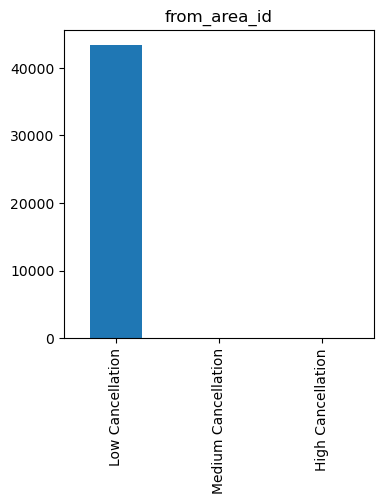

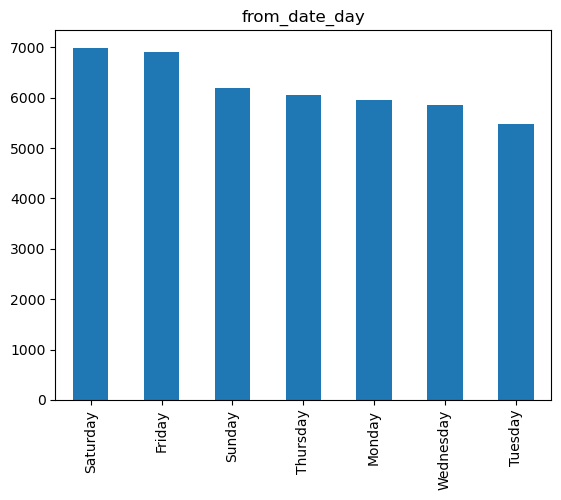

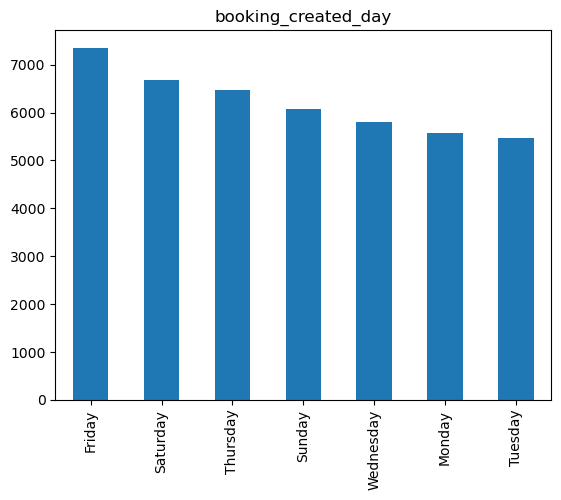

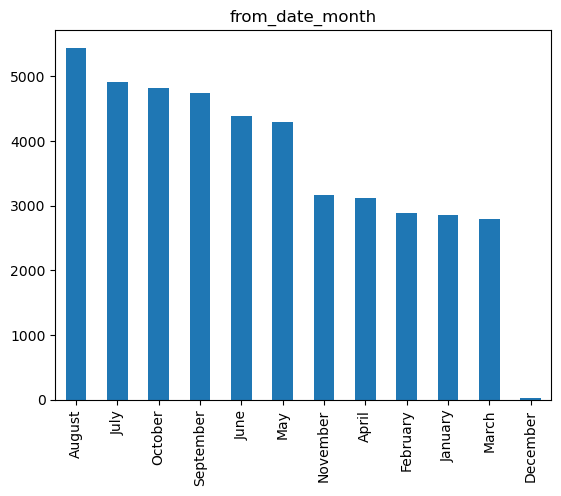

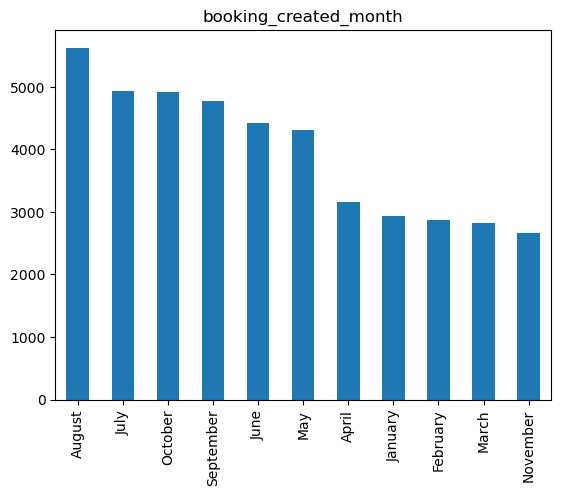

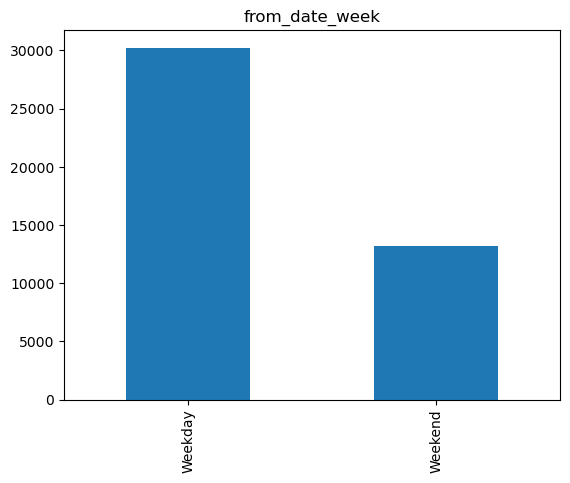

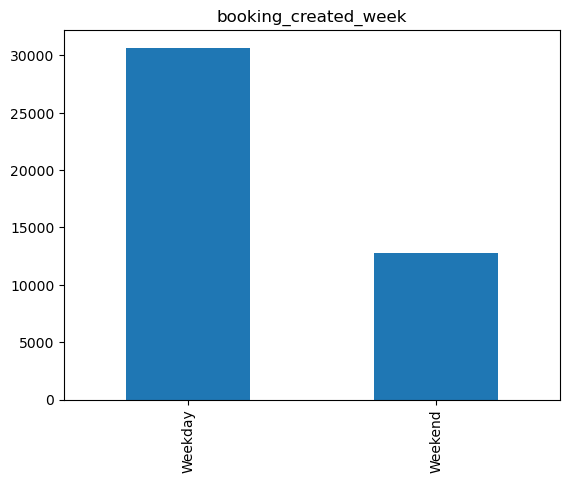

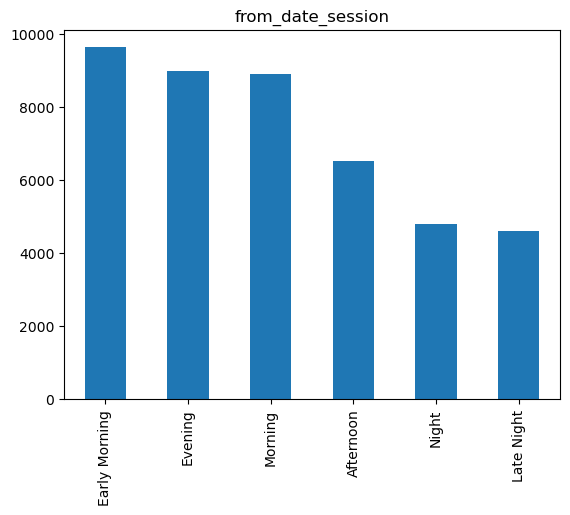

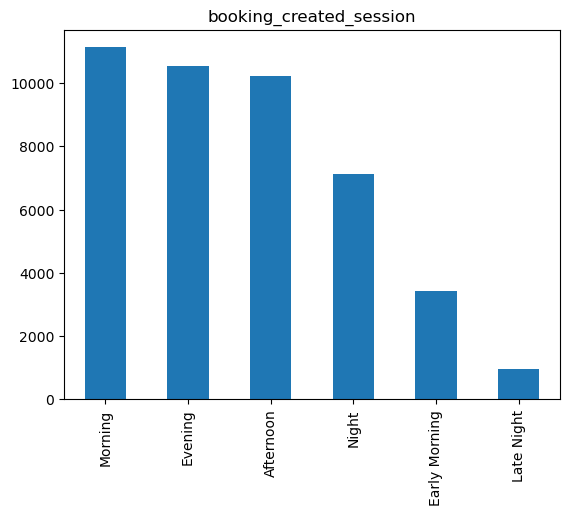

In [153]:
plt.figure(figsize =(4,4))
for col in data.columns:
  if data[col].dtype == 'object':
    data[col].value_counts().plot.bar()
    plt.title(col)
    plt.show()

### Dividing data into Numerical and Categorical dataframes

In [154]:
num = data.select_dtypes(include='number')
char = data.select_dtypes(include='object')

In [155]:
num.head(2)

,online_booking,mobile_site_booking,traveltype_pointtopoint,traveltype_hourly,distance,time_diff
0,0,0,1,0,3.980687,21.0
1,0,0,1,0,14.004432,395.0


In [156]:
char.head(2)

,from_area_id,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session
0,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night
1,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Late Night


### Encoding Categorical variables

In [157]:
X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum.shape

(43431, 47)

In [158]:
X_char_dum.head(3)

,from_area_id_Low Cancellation,from_area_id_Medium Cancellation,from_date_day_Monday,from_date_day_Saturday,from_date_day_Sunday,from_date_day_Thursday,from_date_day_Tuesday,from_date_day_Wednesday,booking_created_day_Monday,booking_created_day_Saturday,...,from_date_session_Early Morning,from_date_session_Evening,from_date_session_Late Night,from_date_session_Morning,from_date_session_Night,booking_created_session_Early Morning,booking_created_session_Evening,booking_created_session_Late Night,booking_created_session_Morning,booking_created_session_Night
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [159]:
data_all = pd.concat([num,X_char_dum],axis=1,join='inner')

In [160]:
data_all.head(2)

,online_booking,mobile_site_booking,traveltype_pointtopoint,traveltype_hourly,distance,time_diff,from_area_id_Low Cancellation,from_area_id_Medium Cancellation,from_date_day_Monday,from_date_day_Saturday,...,from_date_session_Early Morning,from_date_session_Evening,from_date_session_Late Night,from_date_session_Morning,from_date_session_Night,booking_created_session_Early Morning,booking_created_session_Evening,booking_created_session_Late Night,booking_created_session_Morning,booking_created_session_Night
0,0,0,1,0,3.980687,21.0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0,0,1,0,14.004432,395.0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [161]:
data_all.shape

(43431, 53)

### Train Test Split

In [162]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data_all,target,test_size=0.3,random_state=1)

In [163]:
X_train.head()

,online_booking,mobile_site_booking,traveltype_pointtopoint,traveltype_hourly,distance,time_diff,from_area_id_Low Cancellation,from_area_id_Medium Cancellation,from_date_day_Monday,from_date_day_Saturday,...,from_date_session_Early Morning,from_date_session_Evening,from_date_session_Late Night,from_date_session_Morning,from_date_session_Night,booking_created_session_Early Morning,booking_created_session_Evening,booking_created_session_Late Night,booking_created_session_Morning,booking_created_session_Night
21506,0,0,1,0,9.236426,2832.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12367,0,1,1,0,1.809583,1504.0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
5983,0,0,1,0,13.558000,214.0,1,0,0,1,...,0,0,0,0,1,0,1,0,0,0
18513,0,0,0,0,18.456702,37.0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
16033,1,0,1,0,13.405912,128.0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [164]:
X_test.head()

,online_booking,mobile_site_booking,traveltype_pointtopoint,traveltype_hourly,distance,time_diff,from_area_id_Low Cancellation,from_area_id_Medium Cancellation,from_date_day_Monday,from_date_day_Saturday,...,from_date_session_Early Morning,from_date_session_Evening,from_date_session_Late Night,from_date_session_Morning,from_date_session_Night,booking_created_session_Early Morning,booking_created_session_Evening,booking_created_session_Late Night,booking_created_session_Morning,booking_created_session_Night
26610,0,0,0,1,3.417640,208.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
38515,0,0,0,1,4.104127,69.0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
29806,0,1,0,1,11.849498,457.0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
28868,0,0,0,1,8.116004,2371.0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
11163,1,0,1,0,27.427907,444.0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


### Classifiaction Model Building


In [167]:
import warnings
warnings.filterwarnings('ignore')


### 1. Logistic Regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=4)
lr.fit(X_train,y_train)

LogisticRegression(random_state=4)

In [168]:
### 2. Decision Tree

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini',random_state=4)

In [169]:
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250]}
gscv_dtc = GridSearchCV(dtc, cv=10, param_grid=param_dist, n_jobs=-1)
gscv_dtc.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=4), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 6, 7],
                         'min_samples_split': [50, 100, 150, 200, 250]})

In [170]:
gscv_dtc.best_params_

{'max_depth': 7, 'min_samples_split': 50}

In [171]:
dtc = DecisionTreeClassifier(criterion='gini',random_state=4,max_depth=7,min_samples_split=50)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=50, random_state=4)

In [172]:
### 3. Random Forest

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='gini',random_state=4)

In [173]:
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250]}
gscv_rfc = GridSearchCV(rfc, cv=10, param_grid=param_dist, n_jobs=-1)
gscv_rfc.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=4), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 6, 7],
                         'min_samples_split': [50, 100, 150, 200, 250]})

In [174]:
gscv_rfc.best_params_

{'max_depth': 7, 'min_samples_split': 50}

In [175]:
rfc=RandomForestClassifier(criterion='gini',random_state=4,max_depth=7,min_samples_split=50)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, min_samples_split=50, random_state=4)

### Model Evaluation

In [176]:
y_pred_lr=lr.predict(X_test)
y_pred_dtc=dtc.predict(X_test)
y_pred_rfc=rfc.predict(X_test)

In [177]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [185]:
print('**Logistic Regression Metrics**')
print(' ')
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_lr))
print('Precision:', metrics.precision_score(y_test, y_pred_lr))
print('Recall:', metrics.recall_score(y_test, y_pred_lr))
print('f1_score:', metrics.f1_score(y_test, y_pred_lr))

**Logistic Regression Metrics**
 
Accuracy: 0.929623944742901
Precision: 0.5581395348837209
Recall: 0.07725321888412018
f1_score: 0.1357210179076343


In [186]:
print('**Decision Tree Metrics**')
print(' ')
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_dtc))
print('Precision:', metrics.precision_score(y_test, y_pred_dtc))
print('Recall:', metrics.recall_score(y_test, y_pred_dtc))
print('f1_score:', metrics.f1_score(y_test, y_pred_dtc))

**Decision Tree Metrics**
 
Accuracy: 0.9323100537221796
Precision: 0.6865671641791045
Recall: 0.09871244635193133
f1_score: 0.1726078799249531


In [187]:
print('**Random Forest Metrics**')
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_rfc))
print('Precision:', metrics.precision_score(y_test, y_pred_rfc))
print('Recall:', metrics.recall_score(y_test, y_pred_rfc))
print('f1_score:', metrics.f1_score(y_test, y_pred_rfc))

**Random Forest Metrics**
Accuracy: 0.930775134305449
Precision: 1.0
Recall: 0.032188841201716736
f1_score: 0.06237006237006236
